In [2]:
library(tidyverse)
library(h2o)

In [3]:
mnist <- dslabs::read_mnist()
names(mnist)

[1] "train" "test"

In [4]:
h2o.no_progress()
h2o.init(max_mem_size = "5g")


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    C:\Users\APF_TE~1\AppData\Local\Temp\RtmpasVAVB\file26d85d067643/h2o_apf_temp_admin_started_from_r.out
    C:\Users\APF_TE~1\AppData\Local\Temp\RtmpasVAVB\file26d8bb12ca8/h2o_apf_temp_admin_started_from_r.err


Starting H2O JVM and connecting: . Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         13 seconds 721 milliseconds 
    H2O cluster timezone:       Asia/Seoul 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.36.0.4 
    H2O cluster version age:    8 days  
    H2O cluster name:           H2O_started_from_R_apf_temp_admin_wbm272 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   4.44 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection pro

## 오토인코더
- 입력 데이터의 효율적인 표현을 학습하도록 훈련된 신경망
- 차원축소, 변칙감지 및 생성모델링에 사용
- 피드프워드 딥러닝 모델

### 불완전 오토인코더
- 피드포워드 신경망과 매우 유사한 구조
- **주요차이점은 출력층의 뉴런수가 입력층과 동일**
- **결과적으로 오토인코더는 은닉층을 사용하여 새로운 입력을 생성**
<img src = "https://bradleyboehmke.github.io/HOML/images/Autoencoder_structure.png">

- **차원축소를 통해, 은닉층 뉴런수가 입력층보다 적도록 => 불완전 오토인코더** 
- 오토인코더가 은닉층에서 입력데이터의 특징을 포착

### X와 X'의 차이를 최소화 minimize f(X, X')

#### PCA와의 비교
- 오토인코더가 선형활성화함수만 사용하고, 손실함수가 MSE인 경우 PCA와 동일

### ```h2o.deeplearning()```
- ```training_frame``` : 
- ```autoencoder``` : 오토인코더
- ```hidden``` : 은닉층 크기
- ```activation``` : 활성화 함수 ["Tanh", "TanhWithDropout", "Rectifier", "RectifierWithDropout", "Maxout", "MaxoutWithDropout"]
- ```sparse``` : 희소데이터(대부분의 값이 0)인경우 TRUE

In [5]:
features <- as.h2o(mnist$train$images)

In [10]:
ae1 <- h2o.deeplearning(
  x = seq_along(features),
  training_frame = features,
  autoencoder = TRUE,
  hidden = 2,
  activation = 'Tanh',
  sparse = TRUE
)

Warning message in .h2o.processResponseWarnings(res):
"Dropping bad and constant columns: [V728, V646, V645, V729, V21, V20, V23, V22, V25, V731, V24, V730, V27, V1, V26, V2, V29, V3, V28, V4, V5, V6, V7, V8, V759, V9, V758, V757, V756, V755, V30, V32, V31, V169, V760, V561, V702, V701, V700, V83, V85, V84, V86, V477, V113, V674, V112, V673, V672, V10, V54, V53, V12, V56, V11, V55, V58, V57, V784, V783, V18, V782, V17, V781, V142, V19, V141].
"


In [17]:
ae1

Model Details:

H2OAutoEncoderModel: deeplearning
Model ID:  DeepLearning_model_R_1649368278856_1 
Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 3,587 weights/biases, 154.2 KB, 620,077 training samples, mini-batch size 1
  layer units  type dropout       l1       l2 mean_rate rate_rms momentum
1     1   717 Input  0.00 %       NA       NA        NA       NA       NA
2     2     2  Tanh  0.00 % 0.000000 0.000000  1.004224 0.000000 0.000000
3     3   717  Tanh      NA 0.000000 0.000000  1.004224 0.000000 0.000000
  mean_weight weight_rms mean_bias bias_rms
1          NA         NA        NA       NA
2   -0.001120   0.052460  0.000000 0.000000
3    0.000502   0.052468  0.000000 0.000000


H2OAutoEncoderMetrics: deeplearning
** Reported on training data. **

Training Set Metrics: 

MSE: (Extract with `h2o.mse`) 0.07425346
RMSE: (Extract with `h2o.rmse`) 0.2724949






### ```h2o.deepfeatures()```
- 축소된 차원코딩 DF(심층특징)을 추출
- DF는 본질적으로 PCA의 주성분, GLRM의 Arch와 유사

In [19]:
ae1_codings <- h2o.deepfeatures(ae1, features, layer = 1)
ae1_codings

    DF.L1.C1   DF.L1.C2
1  0.1442474  0.4093892
2  0.2358496  0.4305286
3  0.1001520 -0.4745379
4  0.3215476 -0.1473281
5 -0.6343778  0.1413706
6 -0.3453998 -0.3614574

[60000 rows x 2 columns] 

Warning message in .h2o.processResponseWarnings(res):
"Dropping bad and constant columns: [V728, V646, V645, V729, V21, V20, V23, V22, V25, V731, V24, V730, V27, V1, V26, V2, V29, V3, V28, V4, V5, V6, V7, V8, V759, V9, V758, V757, V756, V755, V30, V32, V31, V169, V760, V561, V702, V701, V700, V83, V85, V84, V86, V477, V113, V674, V112, V673, V672, V10, V54, V53, V12, V56, V11, V55, V58, V57, V784, V783, V18, V782, V17, V781, V142, V19, V141].
"
Warning message in doTryCatch(return(expr), name, parentenv, handler):
"_train: Dataset used may contain fewer number of rows due to removal of rows with NA/missing values.  If this is not desirable, set impute_missing argument in pca call to TRUE/True/true/... depending on the client language."


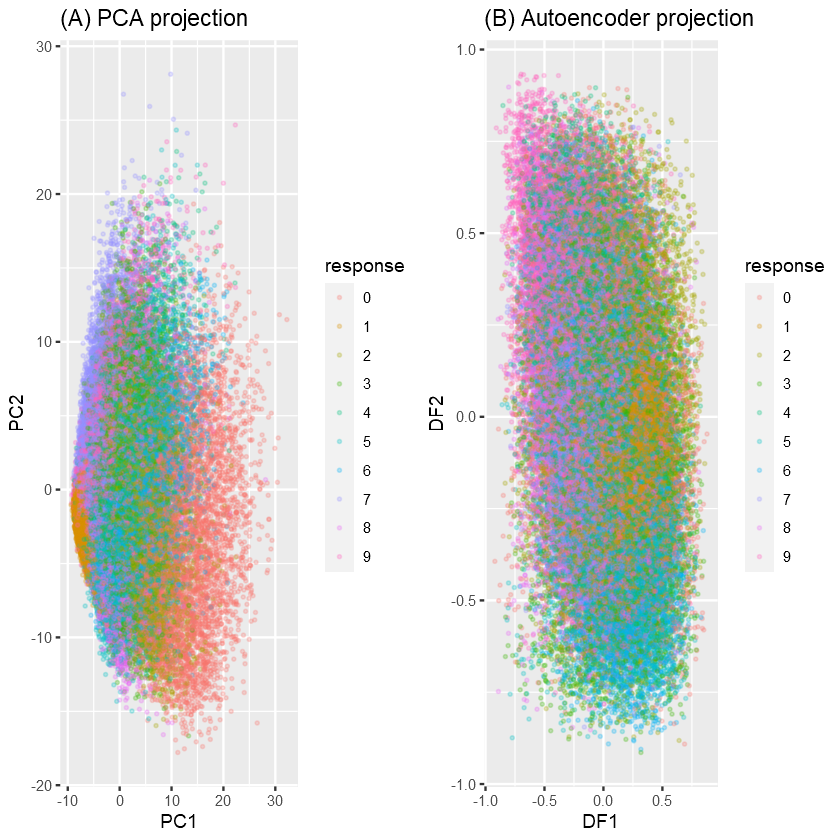

In [20]:
pca1 <- h2o.prcomp(
  training_frame = features,
  k = 2,
  transform = 'STANDARDIZE'
)

pca_plot <- predict(pca1, features) %>%
  as.data.frame() %>%
  select(PC1, PC2) %>%
  mutate(response = factor(mnist$train$labels)) %>%
  ggplot(aes(PC1, PC2)) +
  geom_point(aes(color = response), size = 0.5, alpha = 0.25) +
  ggtitle('(A) PCA projection')

ae_plot <- ae1_codings %>%
  as.data.frame() %>%
  select(DF1 = 'DF.L1.C1', DF2 = 'DF.L1.C2') %>%
  mutate(response = factor(mnist$train$labels)) %>%
  ggplot(aes(DF1, DF2, color = response)) +
  geom_point(size = .5, alpha = .25) +
  ggtitle('(B) Autoencoder projection')

gridExtra::grid.arrange(pca_plot, ae_plot, nrow = 1)

### 스택 오토인코더
- 은닉층이 여러개
- 더 복잡한 비선형관계 표현 가능
- **일반화되는 두드러진 기능을 식별하지 않으면서 입력을 거의 완벽하게 복구할 위험이 있으므로, 너무 복잡하고 강력하게 만들면 안됨**

<img src = "https://bradleyboehmke.github.io/HOML/images/autoencoder-symmetry.png">

#### 은닉층의 크기는 언제나 대칭관계

### 그리드서치
- 은닉층의 개수 결정

In [22]:
hyper_grid <- list(hidden = list(
  c(50),
  c(100), 
  c(300, 100, 300),
  c(100, 50, 100),
  c(250, 100, 50, 100, 250)
))
hyper_grid %>% head

$hidden
$hidden[[1]]
[1] 50

$hidden[[2]]
[1] 100

$hidden[[3]]
[1] 300 100 300

$hidden[[4]]
[1] 100  50 100

$hidden[[5]]
[1] 250 100  50 100 250

In [24]:
ae_grid <- h2o.grid(
  algorithm = 'deeplearning',
  x = seq_along(features),
  training_frame = features,
  grid_id = 'autoencoder_grid',
  autoencoder = TRUE,
  activation = 'Tanh',
  hyper_params = hyper_grid,
  sparse = TRUE,
  ignore_const_cols = FALSE,
  seed = 123
)

In [55]:
h2o.getGrid('autoencoder_grid', 'mse')

H2O Grid Details

Grid ID: autoencoder_grid 
Used hyper parameters: 
  -  hidden 
Number of models: 5 
Number of failed models: 0 

Hyper-Parameter Search Summary: ordered by increasing mse
                    hidden                model_ids     mse
1                      100 autoencoder_grid_model_2 0.01175
2          [300, 100, 300] autoencoder_grid_model_3 0.01645
3                       50 autoencoder_grid_model_1 0.01702
4           [100, 50, 100] autoencoder_grid_model_4 0.02194
5 [250, 100, 50, 100, 250] autoencoder_grid_model_5 0.03442

#### 크기 100의 1개의 은닉층을 가지는 모형이 가장낮은 MSE값을 가짐

### 복구 시각화 (reconstruction)
- 오토인코더의 원래 입력에 대한 복구 능력
- 오토인코더의 목적을 차이미지의 두드러진 특징을 포착하는 것

In [47]:
index <- sample(1:nrow(mnist$test$images), 4)
sampled_digits <- mnist$test$images[index, ]
colnames(sampled_digits) <- paste0("V", seq_len(ncol(sampled_digits)))

In [48]:
best_model_id <- ae_grid@model_ids[[1]]
best_model <- h2o.getModel(best_model_id)

reconstructed_digits <- predict(best_model, as.h2o(sampled_digits))
names(reconstructed_digits) <- paste0("V", seq_len(ncol(reconstructed_digits)))

combine <- rbind(sampled_digits, as.matrix(reconstructed_digits))
combine

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784
0.0000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,...,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0.00000000,0.0000000000,0.0000000000,0.000000000,0.0000000000
0.0000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,...,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0.00000000,0.0000000000,0.0000000000,0.000000000,0.0000000000
0.0000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,...,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0.00000000,0.0000000000,0.0000000000,0.000000000,0.0000000000
0.0000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,...,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0.00000000,0.0000000000,0.0000000000,0.000000000,0.0000000000
-0.0067688112,-0.004169839,-0.002805655,-0.0005702383,0.010170604,0.004087202,-0.010286410,-0.001468864,-0.0039179578,-0.0032709740,...,-0.1263074,-1.12390147,0.40735821,6.1366131,-0.6288495,-0.02714438,-0.0000919255,-0.0010070875,0.001110299,0.0025655134
-0.0086216625,-0.003093973,-0.002227586,-0.0048542459,0.004830180,0.005875894,-0.011196922,0.001969239,-0.0034618610,0.0023037234,...,3.5944419,-0.47782538,0.49614835,1.4730508,-2.0067252,0.05248092,-0.0002160362,-0.0006155465,0.001460844,-0.0001228863
0.0021836164,-0.005213922,0.008649926,-0.0109581378,0.006546010,-0.004127980,-0.007006774,-0.014252865,0.0003912538,-0.0002645161,...,10.3771408,0.07264675,0.05213618,4.1066122,1.5860556,-0.12459979,-0.0021885143,-0.0037504799,-0.004822709,0.0027432013
-0.0001429728,-0.002209701,0.001694881,-0.0018302841,0.004466501,-0.001841667,-0.003981518,-0.004844556,0.0022843502,-0.0006917726,...,1.3129752,-0.32388791,-0.41004017,0.9181837,-1.1077560,0.27391245,0.0033690340,0.0029400368,0.003210029,-0.0059025975


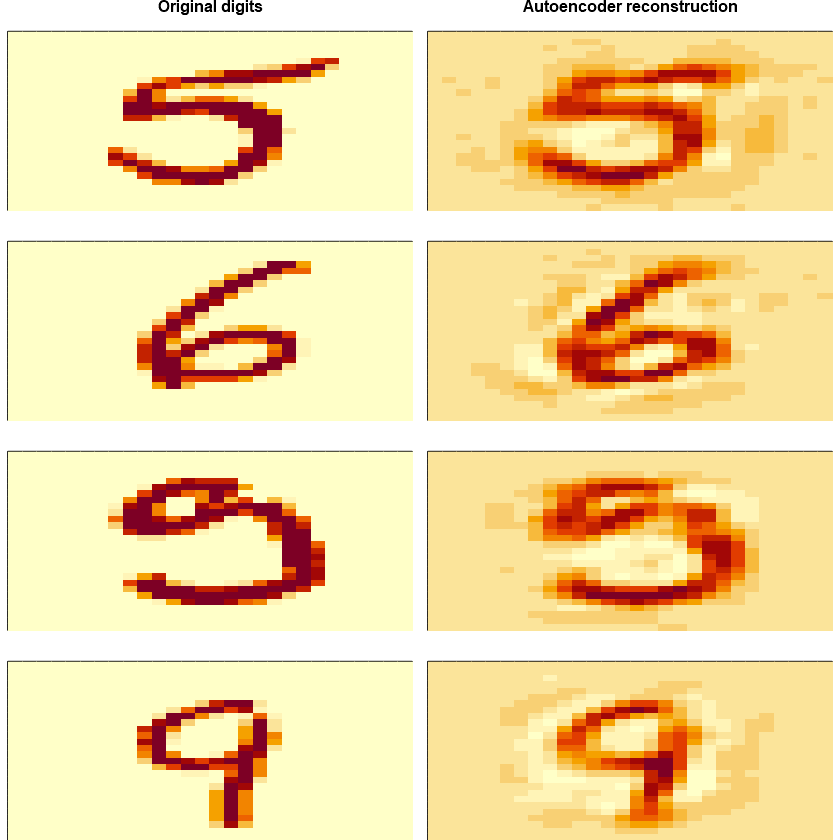

In [51]:
par(mfrow = c(1, 3), mar = c(0, 0.5, 2, 0.5))
layout(matrix(seq_len(nrow(combine)), 4, 2, byrow = FALSE))
for (i in seq_len(nrow(combine))) {
  title <- switch(as.character(i), "1" = "Original digits\n", 
                  "5" = "Autoencoder reconstruction\n", NULL)
  image(matrix(combine[i, ], 28, 28)[, 28:1], 
        xaxt = "n", yaxt = "n", main = title)
} 

### 희소 오토인코더
- 가장 영향력 있는 특징 표현을 추출
- 데이터세트의 가장 고유한 기능을 파악
- 전반에 걸쳐 고유한 신호를 강조표시하는데 도움

- Tanh 활성화 함수는 -1에서 1까지 S 곡선이므로 출력 값이 1에 가까우면 뉴런이 활성화되고 출력이 -1에 가까우면 비활성화
- 희소성 을 통합 하면 더 많은 뉴런이 비활성화 됨, 이를 위해서 오토인코더가 각 입력을 더 적은 수의 활성화 조합으로 나타내야함

In [52]:
ae100_codings <- h2o.deepfeatures(best_model, features, layer = 1)

In [60]:
codings <- ae100_codings %>% 
  as.data.frame() %>% 
  gather() %>%
  group_by(key) %>% 
  summarize(average_activation = mean(value)) %>% 
  arrange(desc(average_activation))

codings %>% head

key,average_activation
<chr>,<dbl>
DF.L1.C30,0.5960828
DF.L1.C7,0.5812459
DF.L1.C12,0.4726008
DF.L1.C17,0.4299519
DF.L1.C32,0.3735312
DF.L1.C40,0.3268010


In [62]:
avg_activation <- summarize(codings, avg = mean(average_activation))
avg_activation %>% head

avg
<dbl>
-0.09955442


#### best_model의 경우 평균 희소성 수준 (average_activation)은 대략 -0.1

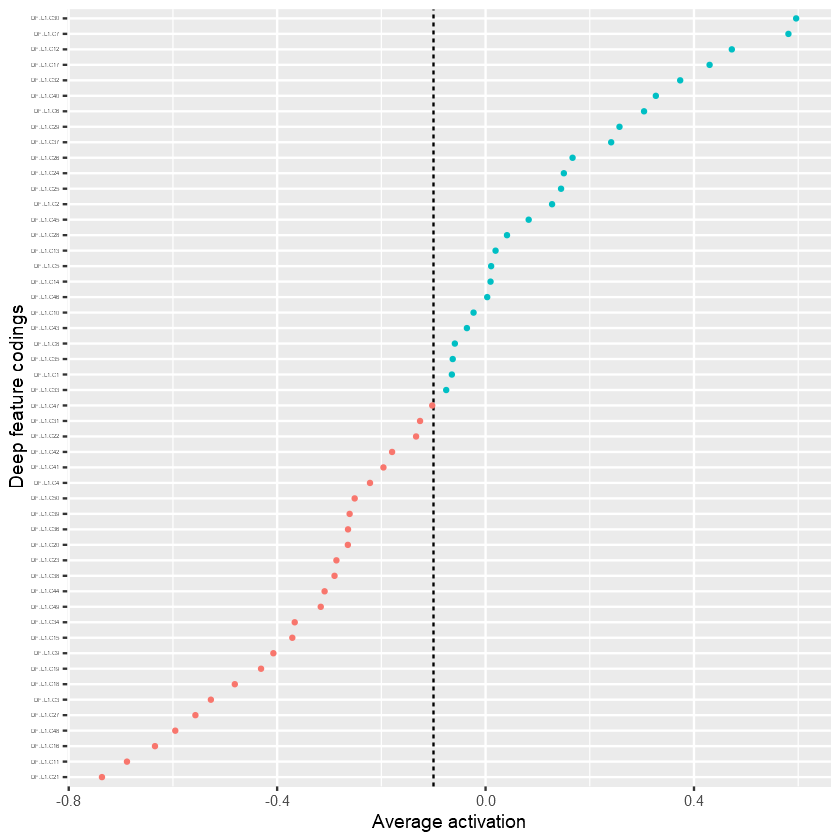

In [63]:
ggplot(codings, aes(average_activation, reorder(key, average_activation), 
                    color = average_activation > avg_activation$avg)) +
  geom_vline(xintercept = avg_activation$avg, lty = 'dashed') +
  geom_point(show.legend = FALSE, size = .75) +
  ylab("Deep feature codings") +
  xlab("Average activation") +
  theme(axis.text.y = element_text(size = 3))

#### 이것은 평균적으로 코딩 뉴런이 절반의 시간 동안 활성 상태임을 의미

### 그리드서치
- **희소 오토인코더는 제약조건을 적용**
- **average_activation (rho, 희소성 매개변수) : 너무 활동적인 뉴런에 불이익을 주어 덜 활성화**
- **sparsity_beta : 릿지나 라쏘 규제의 labmda와 유사한 페널티**, 
    - **초매개변수**
    - 너무 높으면 모델은 희소성에 밀접하게 고정되지만, 입력을 최적으로 구성하지 못함,
    - 너무 낮으면 모델은 희소성을 무시

- 기능이나 이미지를 설명하는 가장 필수적인 특성을 이해하려는 경우 더 낮은 희소성 값이 선호
- 희소성을 추가하면 샘플링된 숫자의 고유성을 유도하는 기능을 강조하는 데 도움

In [64]:
hyper_grid <- list(sparsity_beta = c(0.01, 0.05, 0.1, 0.2))

In [65]:
ae_sparsity_grid <- h2o.grid(
  algorithm = 'deeplearning',
  x = seq_along(features),
  training_frame = features,
  grid_id = 'sparsity_grid',
  autoencoder = TRUE,
  hidden = 100,
  activation = 'Tanh',
  hyper_params = hyper_grid,
  sparse = TRUE,
  average_activation = -0.1,
  ignore_const_cols = FALSE,
  seed = 123
)

In [66]:
h2o.getGrid('sparsity_grid', sort_by = 'mse')

H2O Grid Details

Grid ID: sparsity_grid 
Used hyper parameters: 
  -  sparsity_beta 
Number of models: 4 
Number of failed models: 0 

Hyper-Parameter Search Summary: ordered by increasing mse
  sparsity_beta             model_ids     mse
1       0.20000 sparsity_grid_model_4 0.01087
2       0.05000 sparsity_grid_model_2 0.01094
3       0.10000 sparsity_grid_model_3 0.01151
4       0.01000 sparsity_grid_model_1 0.01151

In [67]:
best_model_id <- ae_sparsity_grid@model_ids[[1]]
best_model <- h2o.getModel(best_model_id)

In [68]:
sparse_codings <- h2o.deepfeatures(best_model, features, layer = 1)

In [69]:
codings <- sparse_codings %>% 
  as.data.frame() %>% 
  gather() %>%
  group_by(key) %>% 
  summarize(average_activation = mean(value)) %>% 
  arrange(desc(average_activation))

codings %>% head

key,average_activation
<chr>,<dbl>
DF.L1.C74,0.7095939
DF.L1.C43,0.6355601
DF.L1.C59,0.5426126
DF.L1.C82,0.4790008
DF.L1.C67,0.4533017
DF.L1.C95,0.4442189


In [70]:
avg_activation <- summarize(codings, avg = mean(average_activation))
avg_activation %>% head

avg
<dbl>
-0.1233104


#### best_model의 경우 희소성 수준 (average_activation)은 대략 -0.12

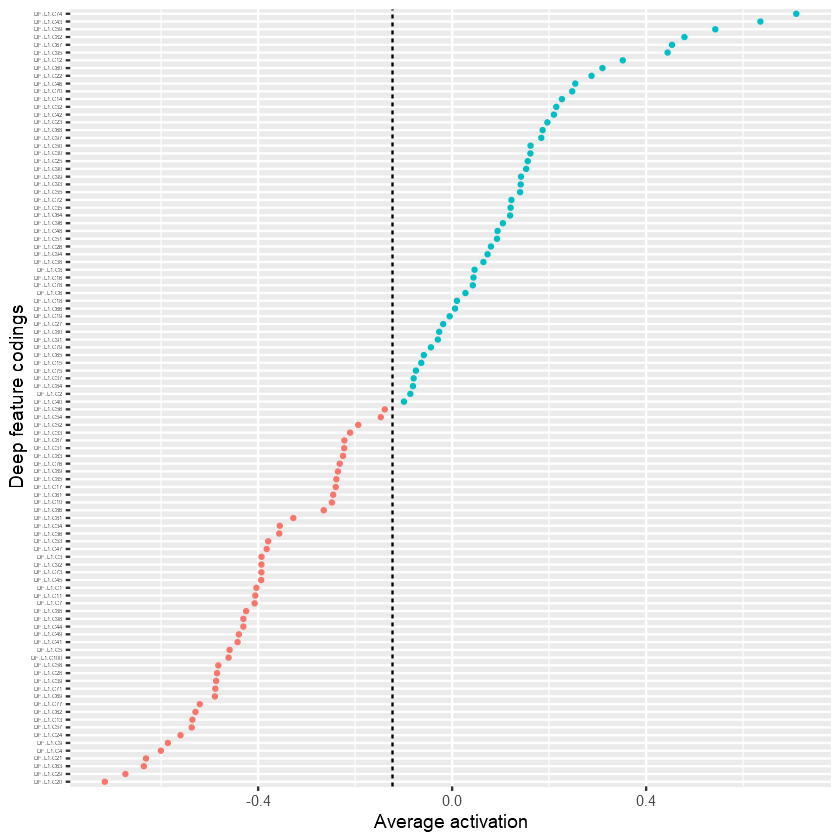

In [71]:
ggplot(codings, aes(average_activation, reorder(key, average_activation), 
                    color = average_activation > avg_activation$avg)) +
  geom_vline(xintercept = avg_activation$avg, lty = 'dashed') +
  geom_point(show.legend = FALSE, size = .75) +
  ylab("Deep feature codings") +
  xlab("Average activation") +
  theme(axis.text.y = element_text(size = 3))

#### 이전 모델에 비해 기준선이 좌측으로

#### 복구 시각화

In [74]:
reconstructed_digits2 <- predict(best_model, as.h2o(sampled_digits))
names(reconstructed_digits2) <- paste0("V", seq_len(ncol(reconstructed_digits2)))

combine <- rbind(combine, as.matrix(reconstructed_digits2))
combine

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784
0.0000000000,0.000000000,0.000000000,0.0000000000,0.000000e+00,0.000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,...,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0.00000000,0.0000000000,0.0000000000,0.000000000,0.0000000000
0.0000000000,0.000000000,0.000000000,0.0000000000,0.000000e+00,0.000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,...,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0.00000000,0.0000000000,0.0000000000,0.000000000,0.0000000000
0.0000000000,0.000000000,0.000000000,0.0000000000,0.000000e+00,0.000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,...,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0.00000000,0.0000000000,0.0000000000,0.000000000,0.0000000000
0.0000000000,0.000000000,0.000000000,0.0000000000,0.000000e+00,0.000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,...,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0.00000000,0.0000000000,0.0000000000,0.000000000,0.0000000000
-0.0067688112,-0.004169839,-0.002805655,-0.0005702383,1.017060e-02,0.004087202,-0.010286410,-0.0014688643,-0.0039179578,-0.0032709740,...,-0.1263074,-1.12390147,0.40735821,6.1366131,-0.6288495,-0.02714438,-0.0000919255,-0.0010070875,0.001110299,0.0025655134
-0.0086216625,-0.003093973,-0.002227586,-0.0048542459,4.830180e-03,0.005875894,-0.011196922,0.0019692387,-0.0034618610,0.0023037234,...,3.5944419,-0.47782538,0.49614835,1.4730508,-2.0067252,0.05248092,-0.0002160362,-0.0006155465,0.001460844,-0.0001228863
0.0021836164,-0.005213922,0.008649926,-0.0109581378,6.546010e-03,-0.004127980,-0.007006774,-0.0142528650,0.0003912538,-0.0002645161,...,10.3771408,0.07264675,0.05213618,4.1066122,1.5860556,-0.12459979,-0.0021885143,-0.0037504799,-0.004822709,0.0027432013
-0.0001429728,-0.002209701,0.001694881,-0.0018302841,4.466501e-03,-0.001841667,-0.003981518,-0.0048445564,0.0022843502,-0.0006917726,...,1.3129752,-0.32388791,-0.41004017,0.9181837,-1.1077560,0.27391245,0.0033690340,0.0029400368,0.003210029,-0.0059025975
0.0099583037,-0.007669115,0.001849019,0.0089550271,5.779538e-07,0.007970514,-0.009962204,0.0002295849,-0.0023805657,0.0165517355,...,-3.2299280,2.83182691,-8.49543031,-4.2698207,3.4072605,-2.51519929,0.0022934995,0.0176914909,0.029490561,-0.0166011709
0.0040222585,0.007718899,0.016272156,0.0066715420,-4.312823e-03,0.008809996,-0.016381135,-0.0085332508,-0.0005576838,0.0187333484,...,-1.7535601,-3.71320027,0.63184582,0.3226391,-0.9941297,-1.60602447,0.0024032057,-0.0017950973,-0.010882293,0.0044115176


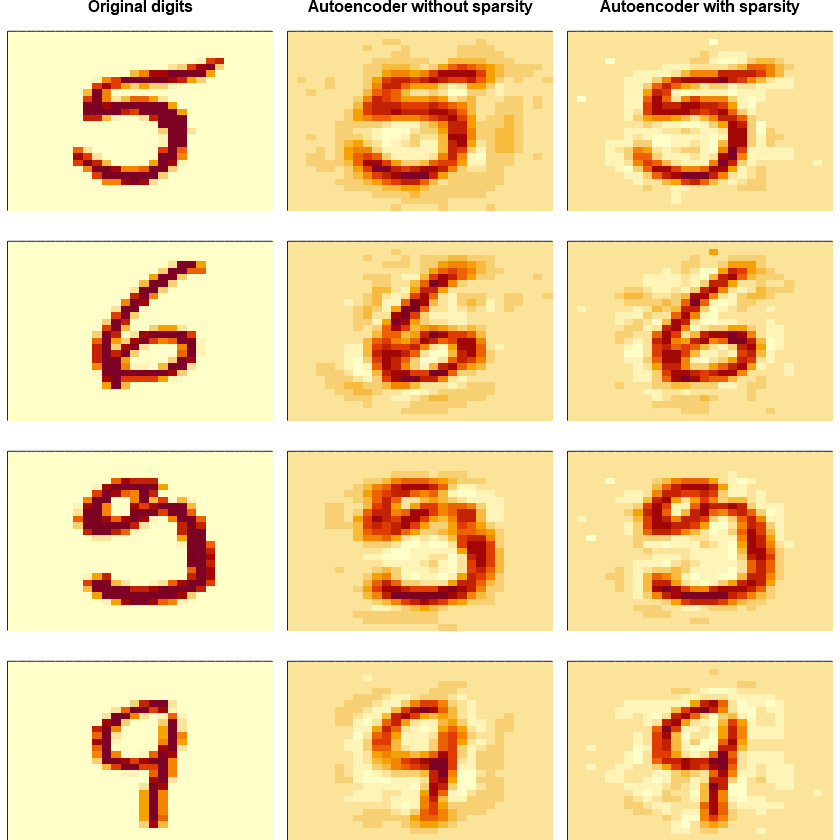

In [75]:
par(mfrow = c(1, 3), mar = c(0, 0.5, 2, 0.5))
layout(matrix(seq_len(nrow(combine)), 4, 3, byrow = FALSE))

for (i in seq_len(nrow(combine))) {
  title <- NULL
  if (i == 1) title <- "Original digits\n"
  if (i == 5) title <- "Autoencoder without sparsity\n"
  if (i == 9) title <- "Autoencoder with sparsity\n"
    
  image(matrix(combine[i, ], 28, 28)[, 28:1], 
        xaxt = "n", yaxt = "n", main = title)
} 

### 손상 프로세스
- **On-Of** : 무작위로 일부입력을 0 또는 1로 설정 (무작위로 값을 0으로 설정하여 결측값으로, 수동수정 혹은 드롭아웃)
- **수치형인 경우 순수 가우스 잡음 추가** : 전체 데이터의 평균과,표준편차를 구한후, 값에 맞게 가우스분포의 난수를 생성하고, 난수에 해당하는 인덱스의 데이터값을 난수로 변경

In [76]:
set.seed(123)
single_sample_index <- sample(seq_len(nrow(features)), 1)

In [78]:
original <- features %>%
  as.data.frame() %>%
  .[single_sample_index, ]

In [79]:
original

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
51663,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### on-of corruption

In [80]:
corrupt_with_ones <- function(x) {
  n_to_sample <- floor(length(x) * .3)
  elements_to_corrupt <- sample(seq_along(x), n_to_sample, replace = FALSE)
  x[elements_to_corrupt] <- 0
  return(x)
}

In [84]:
inputs_currupted_ones <- features %>%
  as.data.frame() %>%
  purrr::map_df(corrupt_with_ones) %>%
  .[single_sample_index, ]

#### Gaussian corruption

In [81]:
avg <- mean(as.matrix(features)) ; avg

[1] 33.31842

In [82]:
sd <- sd(as.matrix(features)) ; sd

[1] 78.56749

In [83]:
corrupt_with_gaussian <- function(x, mean, sd) {
  n_to_sample <- floor(length(x) * .3)
  elements_to_corrupt <- sample(seq_along(x), n_to_sample, replace = FALSE)
    
  random_norm_values <- rnorm(n_to_sample, mean, sd) %>% round()
  for (i in seq_along(random_norm_values)) {
    if (random_norm_values[i] < 0) random_norm_values[i] <- 0
    if (random_norm_values[i] > 255) random_norm_values[i] <- 255
  }
  
  x[elements_to_corrupt] <- random_norm_values
  return(x)
}

In [85]:
inputs_currupted_gaussian <- features %>%
  as.data.frame() %>%
  purrr::map_df(~ corrupt_with_gaussian(.x, avg, sd)) %>%
  .[single_sample_index, ]

combine and save 

In [86]:
corrupted_inputs <- original %>%
  rbind(inputs_currupted_ones) %>%
  rbind(inputs_currupted_gaussian) %>%
  as.matrix()

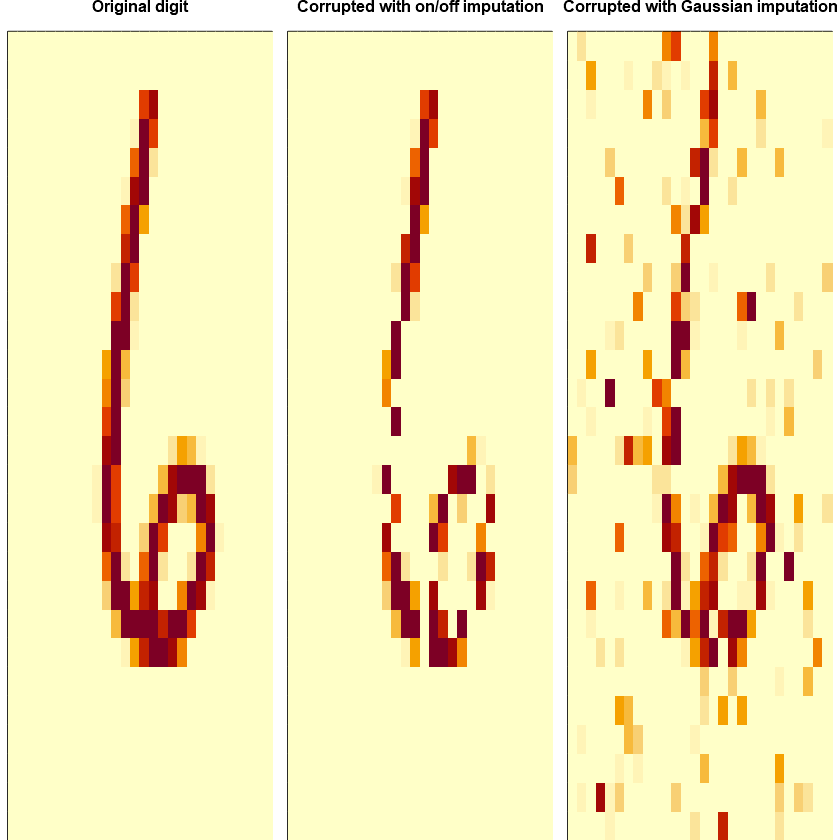

In [87]:
par(mfrow = c(1, 3), mar=c(0, 0.5, 2, 0.5))
layout(matrix(seq_len(nrow(corrupted_inputs)), 1, 3, byrow = FALSE))
for(i in seq_len(nrow(corrupted_inputs))) {
  if (i == 1) title <- "Original digit\n"
  if (i == 2) title <- "Corrupted with on/off imputation\n"
  if (i == 3) title <- "Corrupted with Gaussian imputation\n"
  
  image(matrix(corrupted_inputs[i, ], 28, 28)[, 28:1], 
        xaxt="n", yaxt="n", main = title)
}  

### 노이즈 제거 오토인코더
- 오토인코더의 확률적 버전으로, 오토인코더가 손상된 것에서 입력을 복구하도록 훈련
- 코딩이 입력 보다 강력한 기능을 학습하도록 하고 단순히 항등 기능을 학습하는 것을 방지
- **노이즈 제거 오토인코더의 두 가지 목표**
1. 필수신호를 보존하기 위해 입력을 인코딩하려고 시도
2. 오토인코더의 입력에 확률적으로 적용된 손상 프로세스의 영향을 취소하려고 시도, 입력간의 통계적 종속성을 캡처해야만 수행할 수 있음. 노이즈 제거 절차를 결합하면 입력의 유용한 속성을 암묵적으로 학습할 수 있다.

#### - 일반 오토인코더를 훈련하는 것과 거의 동일 프로세스
#### - ```training_frame``` : 손상된 입력 (손상된 데이터)
#### - ```validation_frame``` : 손상되지 않은 입력 (원 데이터)

In [90]:
inputs_currupted_gaussian <- features %>%
  as.data.frame() %>%
  purrr::map_df(~ corrupt_with_gaussian(.x, avg, sd)) %>%
  as.h2o()

In [91]:
dim(inputs_currupted_gaussian) ; dim(features)

[1] 60000   784

[1] 60000   784

In [92]:
denoise_ae <- h2o.deeplearning(
  x = seq_along(features),
  training_frame = inputs_currupted_gaussian,
  validation_frame = features,
  autoencoder = TRUE,
  hidden = 100,
  activation = 'Tanh',
  sparse = TRUE
)

In [93]:
h2o.performance(denoise_ae, valid = TRUE)

H2OAutoEncoderMetrics: deeplearning
** Reported on validation data. **

Validation Set Metrics: 

MSE: (Extract with `h2o.mse`) 0.01883608
RMSE: (Extract with `h2o.rmse`) 0.1372446



#### 복구 시각화

In [94]:
set.seed(8039)
denoise_index <- sample(1:nrow(features), 4, replace = FALSE)
sampled_originals <- as.matrix(features)[index, ] # 원본 데이터
sampled_corrupted <- as.matrix(inputs_currupted_gaussian)[index, ] # 손상데이터

In [99]:
# 노이즈 제거 오토인코더로, 복구된 데이터
reconstructed_from_corrupted <- as.matrix(predict(denoise_ae, as.h2o(sampled_originals)))

In [100]:
names(reconstructed_from_corrupted) <- paste0("V", seq_len(ncol(reconstructed_from_corrupted)))

In [101]:
corruption_comparison <- sampled_originals %>%
  rbind(sampled_corrupted) %>%
  rbind(reconstructed_from_corrupted)
corruption_comparison

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784
0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
0.00000,0.00000,0.00000,0.00000,64.00000,76.00000,0.00000,0.00000,93.00000,0.00000,...,0.00000,106.00000,103.00000,55.00000,71.00000,0.00000,0.00000,0.00000,0.00000,0.00000
0.00000,0.00000,0.00000,7.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,102.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,114.00000,191.00000,79.00000
0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,78.00000,0.00000,192.00000,77.00000,0.00000,0.00000,0.00000,0.00000,0.00000
15.35326,23.67313,14.18616,34.61807,23.24384,18.74649,26.86909,37.05052,39.58452,23.40124,...,34.05665,16.53007,30.35373,21.91913,25.52987,25.46165,34.28536,32.26215,26.37459,23.75218
15.56079,35.49979,33.53312,18.11903,16.47205,16.00015,39.74558,33.05959,51.46602,39.91067,...,41.81494,24.04971,30.66408,36.17507,15.33879,26.20274,19.08554,27.49795,30.28045,33.56427


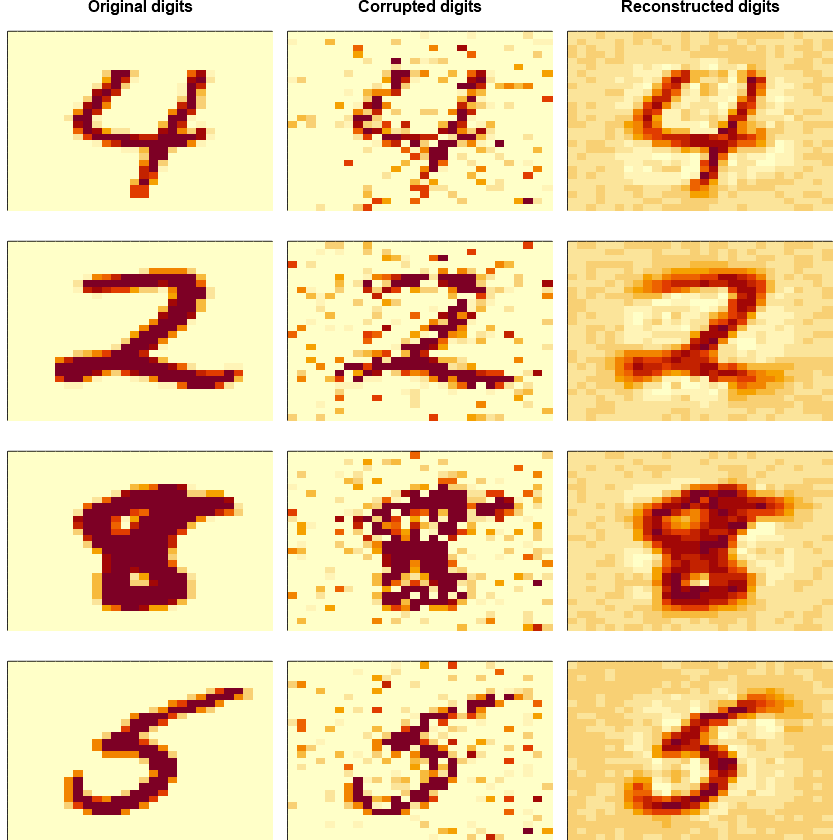

In [102]:
par(mfrow = c(1, 3), mar = c(0, 0.5, 2, 0.5))
layout(matrix(seq_len(nrow(corruption_comparison)), 4, 3, byrow = FALSE))
for (i in seq_len(nrow(corruption_comparison))) {
  title <- NULL
  if (i == 1) title <- "Original digits\n"
  if (i == 5) title <- "Corrupted digits\n"
  if (i == 9) title <- "Reconstructed digits\n"
  
  image(matrix(corruption_comparison[i, ], 28, 28)[, 28:1], 
        xaxt = "n", yaxt = "n", main = title)
}  

### 이상 탐지
- 오토인코더의 손실함수는 복구데이터의 오차를 측정하므로, 이를 통하여 오차가 더 큰 관측치를 식별할 수 있음
- 이러한 관측치에는 다른 특징과 현저하게 다른 특징이 있으며, 이러한 특징을 변칙이나 이상치로 간주

### ```h2o.anomaly()```
- **각 관측값들에 대해서 오토인코더 모형을 통해서 복구된 데이터와, 원본 데이터와의 오차를 계산**

In [103]:
(reconstruction_errors <- h2o.anomaly(best_model, features))

  Reconstruction.MSE
1        0.013138590
2        0.008965329
3        0.023341516
4        0.007822354
5        0.011060088
6        0.011701975

[60000 rows x 1 column] 

#### 오차의 분포

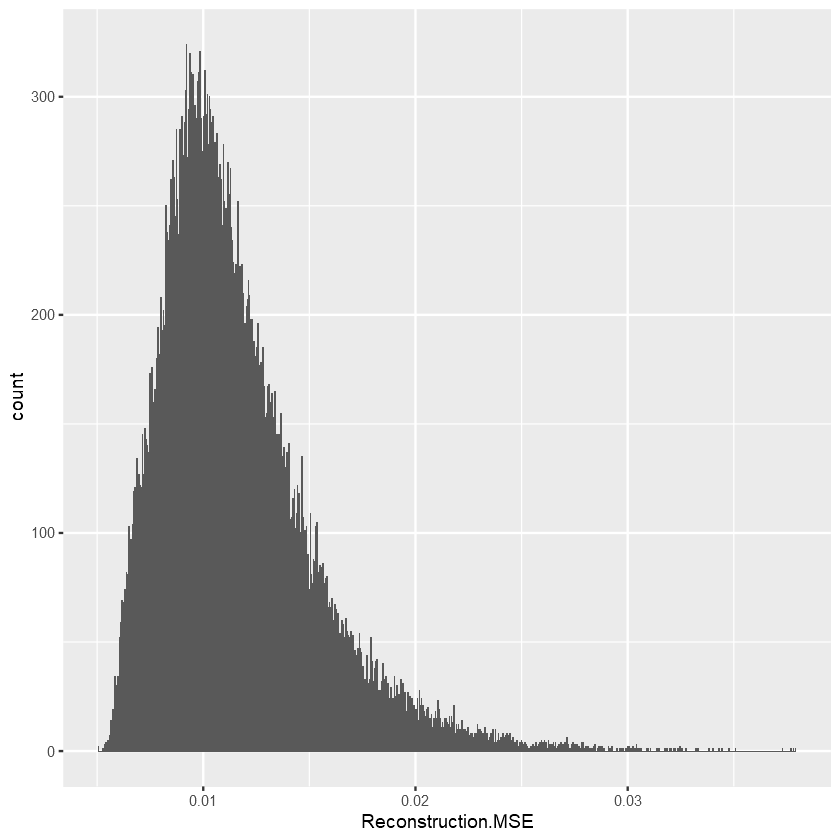

In [112]:
reconstruction_errors <- reconstruction_errors %>% as.data.frame() 
reconstruction_errors %>%
    ggplot(aes(Reconstruction.MSE)) + geom_histogram(bins = 1000)

#### 가장 오차가 큰 관측값 5개

In [120]:
big_error_index <- reconstruction_errors %>% 
    mutate(obs = row_number()) %>% 
    arrange(desc(Reconstruction.MSE)) %>% head(5)

big_error_index
big_error_index <- big_error_index$obs
big_error_index

,Reconstruction.MSE,obs
,<dbl>,<int>
1,0.03789948,13651
2,0.03780419,41055
3,0.03768096,10351
4,0.03729528,56290
5,0.03510096,49501


[1] 13651 41055 10351 56290 49501

In [121]:
big_error_inputs <- as.h2o(as.data.frame(features)[big_error_index, ])
big_errors <- predict(best_model, big_error_inputs) %>% as.matrix()

In [122]:
original_inputs <- as.matrix(features)[big_error_index, ]

colnames(big_errors) <- colnames(original_inputs)
original_vs_big_errors <- rbind(original_inputs, big_errors)
original_vs_big_errors 

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784
0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.00000000,...,0.0000000,0.0000000,0.00000,0.000000,0.0000000,0.000000,0.000000000,0.000000000,0.000000000,0.000000000
0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.00000000,...,0.0000000,0.0000000,0.00000,0.000000,0.0000000,0.000000,0.000000000,0.000000000,0.000000000,0.000000000
0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.00000000,...,0.0000000,0.0000000,0.00000,0.000000,0.0000000,0.000000,0.000000000,0.000000000,0.000000000,0.000000000
0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.00000000,...,0.0000000,0.0000000,0.00000,0.000000,0.0000000,0.000000,0.000000000,0.000000000,0.000000000,0.000000000
0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.00000000,...,0.0000000,0.0000000,0.00000,0.000000,0.0000000,0.000000,0.000000000,0.000000000,0.000000000,0.000000000
0.004081363,-0.010967197,-0.0155856700,-0.009984215,0.008422994,-0.005609883,0.004061236,0.0068924515,0.0098238254,0.01045473,...,-2.1585691,-1.4773814,-24.73809,-15.329598,0.4864089,-8.049332,0.015539754,0.019875270,0.016089918,-0.007054085
0.006587012,-0.014343574,-0.0003812842,-0.003774075,0.015823745,-0.007457849,-0.005250856,0.0074276970,0.0009969458,0.02038656,...,-0.5813643,-1.9734727,-13.61282,-6.414096,2.1421345,-6.120160,0.016341183,0.015166517,0.028176364,-0.002194953
0.001981436,-0.002657856,0.0016130805,0.001064054,0.005212344,-0.002873390,-0.010479436,0.0043914652,0.0130816364,0.02418300,...,-0.2437815,-0.6496259,-25.60218,-10.743995,-3.8866457,-8.349792,0.005152488,0.008246082,-0.005860734,-0.023236678
-0.001396276,0.004277714,0.0020701426,0.011316046,-0.011171796,0.010813653,-0.010747408,-0.0034170630,0.0058701000,0.01393477,...,-1.4056492,-4.1939713,-19.57079,-10.904824,-0.1072736,-6.530216,0.002107952,0.017988731,0.016080399,-0.011141197
0.021619718,-0.005405359,0.0136078995,0.017746005,-0.009323458,0.017035315,-0.022651552,0.0006828508,-0.0017032750,0.02909259,...,-1.5899343,6.4744128,-30.43328,-20.223619,3.5540523,-10.022605,0.018710259,0.028961644,0.014777639,-0.016095224


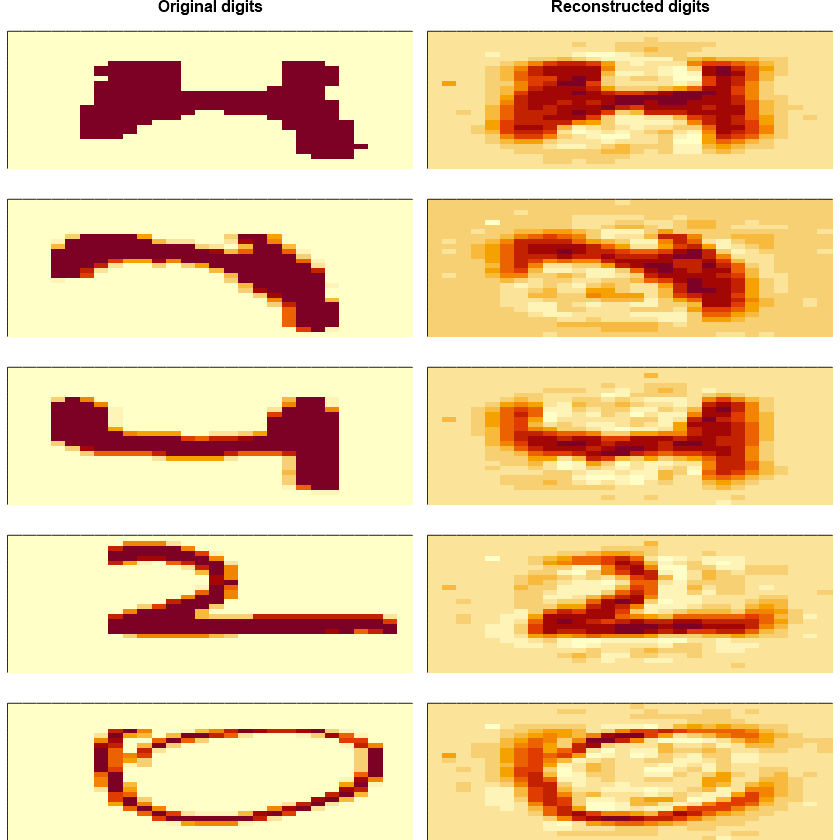

In [123]:
par(mfrow = c(5, 3), mar = c(0, 0.5, 2, 0.5))
layout(matrix(seq_len(nrow(original_vs_big_errors)), 5, 2, byrow = FALSE))

for (i in seq_len(nrow(original_vs_big_errors))) {
  title <- NULL
  if (i == 1) title <- "Original digits\n"
  if (i == 6) title <- "Reconstructed digits\n"
  
  image(matrix(original_vs_big_errors[i, ], 28, 28)[, 28:1], 
        xaxt = "n", yaxt = "n", main = title)
}  

- 이상치를 식별하는 것 외에도 이상 탐지를 사용하여 사기성 신용 카드 거래 및 제조 결함과 같은 비정상적인 입력을 식별할 수도 있다. 
- 이상 탐지를 수행할 때, 고품질 입력이라고 판단한 입력의 하위 집합에 대해, 오토인코더를 재학습함. 
- (예 : 복구 오차의 75분위수 이내를 달성한 모든 입력을 고품질 입력에 포함하고 나머지는 제외. 그런 다음 오토인코더를 다시 훈련시키고 새 입력 데이터에, 해당 오토인코더를 사용하고 특정 백분위수를 초과하면 입력을 비정상으로 선언)
- 그러나 입력을 비정상으로 결정하는 임계값을 결정하는 것은 주관적이며 종종 비즈니스 목적에 의존